In [22]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import joblib

#引入自定义函数
from src.untils.forecaster_fuction import check_missing_values

### 江西数据

In [19]:
file_path = '../../data/raw/dataset_1'
data_name_list = os.listdir(file_path)
data_dic = {}
for i in range(len(data_name_list)):
    name_id = data_name_list[i][:-4]
    if name_id in ['cl', 'js', 'jz','lym', 'qss', 'wtl', 'zh']: # 风电场才读取数据
        data_temp = pickle.load(open(file_path + '/' +data_name_list[i], 'rb'))
        data_dic[name_id] = data_temp
joblib.dump(data_dic, '../../data/processed/archive_data/dataset_1/total_data_dic.joblib')

['../../data/processed/archive_data/dataset_1/total_data_dic.joblib']

In [23]:
data_dic = joblib.load('../../data/processed/archive_data/dataset_1/total_data_dic.joblib')
check_missing_values(data_dic)


缺失值统计信息:
cl: 共有 3549 行缺失值 (占总行数的 10.13%)
  - ws_m: 2013 个缺失值
  - power: 1 个缺失值
  - ws_nwp: 1633 个缺失值
  - tem_nwp: 1633 个缺失值
js: 共有 2013 行缺失值 (占总行数的 5.74%)
  - ws_m: 2013 个缺失值
  - power: 1 个缺失值
  - ws_nwp: 1 个缺失值
  - tem_nwp: 1 个缺失值
jz: 共有 2013 行缺失值 (占总行数的 5.74%)
  - ws_m: 2013 个缺失值
  - power: 1 个缺失值
  - ws_nwp: 385 个缺失值
  - tem_nwp: 385 个缺失值
lym: 共有 4125 行缺失值 (占总行数的 11.77%)
  - ws_m: 2013 个缺失值
  - power: 1 个缺失值
  - ws_nwp: 3841 个缺失值
  - tem_nwp: 3841 个缺失值
qss: 共有 3933 行缺失值 (占总行数的 11.22%)
  - ws_m: 2013 个缺失值
  - power: 1 个缺失值
  - ws_nwp: 2209 个缺失值
  - tem_nwp: 2209 个缺失值
wtl: 共有 3454 行缺失值 (占总行数的 9.86%)
  - ws_m: 2013 个缺失值
  - power: 1 个缺失值
  - ws_nwp: 2018 个缺失值
  - tem_nwp: 2017 个缺失值
zh: 共有 3549 行缺失值 (占总行数的 10.13%)
  - ws_m: 2013 个缺失值
  - power: 1 个缺失值
  - ws_nwp: 1921 个缺失值
  - tem_nwp: 1921 个缺失值

共有 7 个键存在缺失值
1. cl: 3549 行缺失值
2. js: 2013 行缺失值
3. jz: 2013 行缺失值
4. lym: 4125 行缺失值
5. qss: 3933 行缺失值
6. wtl: 3454 行缺失值
7. zh: 3549 行缺失值

第一个含缺失值数据集的部分数据示例:
                     ws_m  power  ws_n

({'cl': {'total_missing_rows': 3549,
   'missing_percentage': 10.128424657534246,
   'variable_breakdown': {'ws_m': 2013,
    'power': 1,
    'ws_nwp': 1633,
    'tem_nwp': 1633}},
  'js': {'total_missing_rows': 2013,
   'missing_percentage': 5.74486301369863,
   'variable_breakdown': {'ws_m': 2013,
    'power': 1,
    'ws_nwp': 1,
    'tem_nwp': 1}},
  'jz': {'total_missing_rows': 2013,
   'missing_percentage': 5.74486301369863,
   'variable_breakdown': {'ws_m': 2013,
    'power': 1,
    'ws_nwp': 385,
    'tem_nwp': 385}},
  'lym': {'total_missing_rows': 4125,
   'missing_percentage': 11.772260273972602,
   'variable_breakdown': {'ws_m': 2013,
    'power': 1,
    'ws_nwp': 3841,
    'tem_nwp': 3841}},
  'qss': {'total_missing_rows': 3933,
   'missing_percentage': 11.22431506849315,
   'variable_breakdown': {'ws_m': 2013,
    'power': 1,
    'ws_nwp': 2209,
    'tem_nwp': 2209}},
  'wtl': {'total_missing_rows': 3454,
   'missing_percentage': 9.85730593607306,
   'variable_breakdown': 

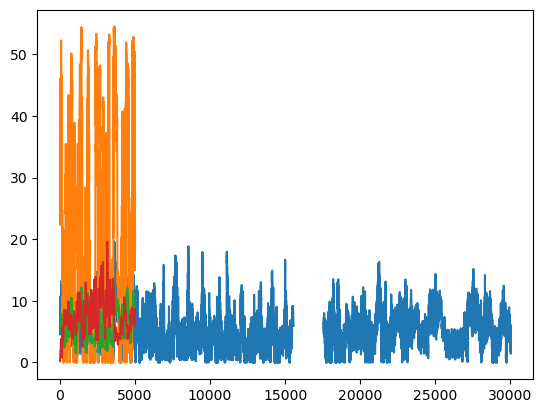

In [27]:
data_temp = data_dic['cl']
plt.plot(np.array(data_temp.iloc[:-5000,0]))
plt.plot(np.array(data_temp.iloc[:5000,1]))
plt.plot(np.array(data_temp.iloc[:5000,2]))
plt.plot(np.array(data_temp.iloc[:5000,3]))